In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [3]:
X_train_full.shape

(60000, 28, 28)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

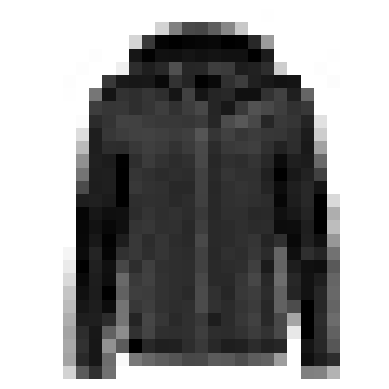

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [6]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Baseline MLP

In [ ]:
mlp_model = keras.models.Sequential()
mlp_model.add(keras.layers.Flatten(input_shape=[28, 28]))
mlp_model.add(keras.layers.Dense(300, activation="relu"))
mlp_model.add(keras.layers.Dense(100, activation="relu"))
mlp_model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
mlp_model.summary()

In [ ]:
mlp_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = mlp_model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## LeNet-5

In [ ]:
X_train2 = X_train.reshape(-1, 28, 28, 1) # single channel
X_valid2 = X_valid.reshape(-1, 28, 28, 1)

In [ ]:
lenet = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(28, 28, 1)),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=5,activation='sigmoid'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='sigmoid'),
            tf.keras.layers.Dense(84, activation='sigmoid'),
            tf.keras.layers.Dense(10, activation="softmax")])


lenet.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

lenet.summary()

In [ ]:
history2 = lenet.fit(X_train2, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])
# Recupero delle metriche di accuratezza per addestramento e validazione
accuracy = history2.history['accuracy']  # Accuratezza sui dati di addestramento
val_accuracy = history2.history['val_accuracy']  # Accuratezza sui dati di validazione

# Visualizzare le prime 5 epoche di accuratezza e val_accuracy
print("Training Accuracy:", accuracy[:5])
print("Validation Accuracy:", val_accuracy[:5])

### Replacing Sigmoid with ReLU

In [ ]:

lenet_alt = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28, 28, 1)),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=5,activation='relu'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='relu'),
            tf.keras.layers.Dense(84, activation='relu'),
            tf.keras.layers.Dense(10, activation="softmax")])


lenet_alt.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history3 = lenet_alt.fit(X_train2, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=15)])

In [ ]:
import pandas as pd

pd.DataFrame(history3).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Exercises

1. Try editing the CNN model above to improve accuracy.
2. Compare SGD and Adam as optimizers from training.